In [1]:
import os
import pandas as pd

# Define the paths to the directories
negative_dir = 'output/extracted_data/negative'
positive_dir = 'output/extracted_data/positive'

# Function to load CSV files from a directory and add a label column
def load_csv_files(directory, label):
    dataframes = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['csf'] = label
            dataframes.append(df)
    return dataframes

# Load negative and positive data
negative_dataframes = load_csv_files(negative_dir, 'negative')
positive_dataframes = load_csv_files(positive_dir, 'positive')

# Combine all dataframes into one
all_data_df = pd.concat(negative_dataframes + positive_dataframes, ignore_index=True)

print("Combined DataFrame:")
# Display the combined dataframe
all_data_df.head()

Combined DataFrame:


,participant_id,block_num,trial_type,trial_num,object_num,real_x,real_z,placed_x,placed_z,distance,csf
0,PAT001,1,WalkAllo,1,1,3.95,-5.36,4.908197,-4.349091,1.392868,negative
1,PAT001,1,WalkAllo,1,2,-0.25,-7.57,1.099445,-7.044486,1.448160,negative
2,PAT001,1,WalkAllo,1,3,8.95,-3.04,7.151240,-0.639039,3.000025,negative
3,PAT001,1,WalkAllo,1,4,4.89,-1.54,4.996998,-0.646246,0.900136,negative
4,PAT001,1,WalkAllo,2,1,4.29,-6.79,4.787381,-5.186185,1.679170,negative


In [4]:
# Calculate the average distance for each participant and trial number
average_distance_temp = all_data_df.groupby(['participant_id', 'trial_num'])['distance'].mean().reset_index()

# Rename the 'distance' column to 'average_distance' for clarity
average_distance_temp = average_distance_temp.rename(columns={'distance': 'average_distance'})

# Merge the trial_type and label columns back into the average_distance_df
average_distance_df = pd.merge(average_distance_temp, all_data_df[['participant_id', 'trial_num', 'trial_type', 'csf']].drop_duplicates(), on=['participant_id', 'trial_num'])

# Display the average distance dataframe
print("\nAverage Distance DataFrame:")
print(average_distance_df.head())


Average Distance DataFrame:
  participant_id  trial_num  average_distance trial_type       csf
0         PAT001          1          1.685297   WalkAllo  negative
1         PAT001          2          1.442675   WalkAllo  negative
2         PAT001          3          3.179518    WalkEgo  negative
3         PAT001          4          1.331102    WalkEgo  negative
4         PAT001          5          2.778936   Teleport  negative


In [6]:
# Calculate the average distance for each participant per trial type
average_distance_per_trial_type = average_distance_df.groupby(['participant_id', 'trial_type'])['average_distance'].mean().reset_index()

# Merge the label column back into the average_distance_per_trial_type
average_distance_per_trial_type = pd.merge(average_distance_per_trial_type, all_data_df[['participant_id', 'csf']].drop_duplicates(), on='participant_id')

# Display the final average distance dataframe
print("\nAverage Distance per Trial Type DataFrame:")
print(average_distance_per_trial_type.head())


Average Distance per Trial Type DataFrame:
  participant_id trial_type  average_distance       csf
0         PAT001   Teleport          2.815263  negative
1         PAT001   WalkAllo          2.463634  negative
2         PAT001    WalkEgo          1.744104  negative
3         PAT002   Teleport          3.556384  positive
4         PAT002   WalkAllo          4.049178  positive


# Plotting different values for csf status

C:\Users\acastegnaro\AppData\Local\Temp\ipykernel_1268\2144896295.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='csf', y='average_distance', data=teleport_data, palette="Set2")


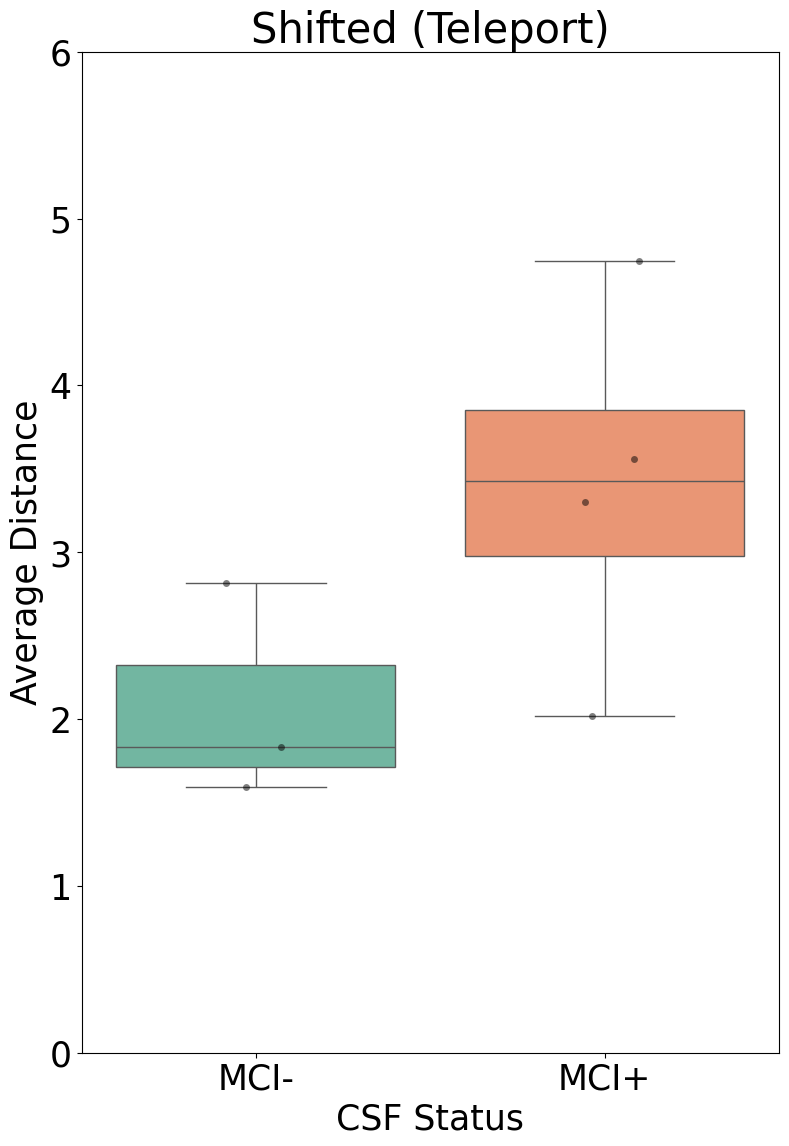

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for Teleport trial type
teleport_data = average_distance_per_trial_type[average_distance_per_trial_type['trial_type'] == 'Teleport']

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(9, 13))

# Create the box plot with the data points
sns.boxplot(x='csf', y='average_distance', data=teleport_data, palette="Set2")
sns.stripplot(x='csf', y='average_distance', data=teleport_data, color='black', jitter=True, dodge=True, alpha=0.5)

# Set plot title and labels
plt.title('Shifted (Teleport)')
plt.xlabel('CSF Status')
plt.ylabel('Average Distance')

# Set the y-axis to start from zero
plt.ylim(0, 6)
plt.xticks(ticks=[0, 1], labels=['MCI-', 'MCI+'])

visualization_output_dir = os.path.join(os.getcwd(),'output','group_visualization')
os.makedirs(visualization_output_dir,exist_ok=True)
filename_pdf = os.path.join(visualization_output_dir, "average_distance_teleport.pdf")
plt.savefig(filename_pdf, format='pdf', dpi=600, bbox_inches='tight', transparent=True)
# Display the plot
plt.show()

C:\Users\acastegnaro\AppData\Local\Temp\ipykernel_1268\3934365469.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='csf', y='average_distance', data=teleport_data, palette="Set2")


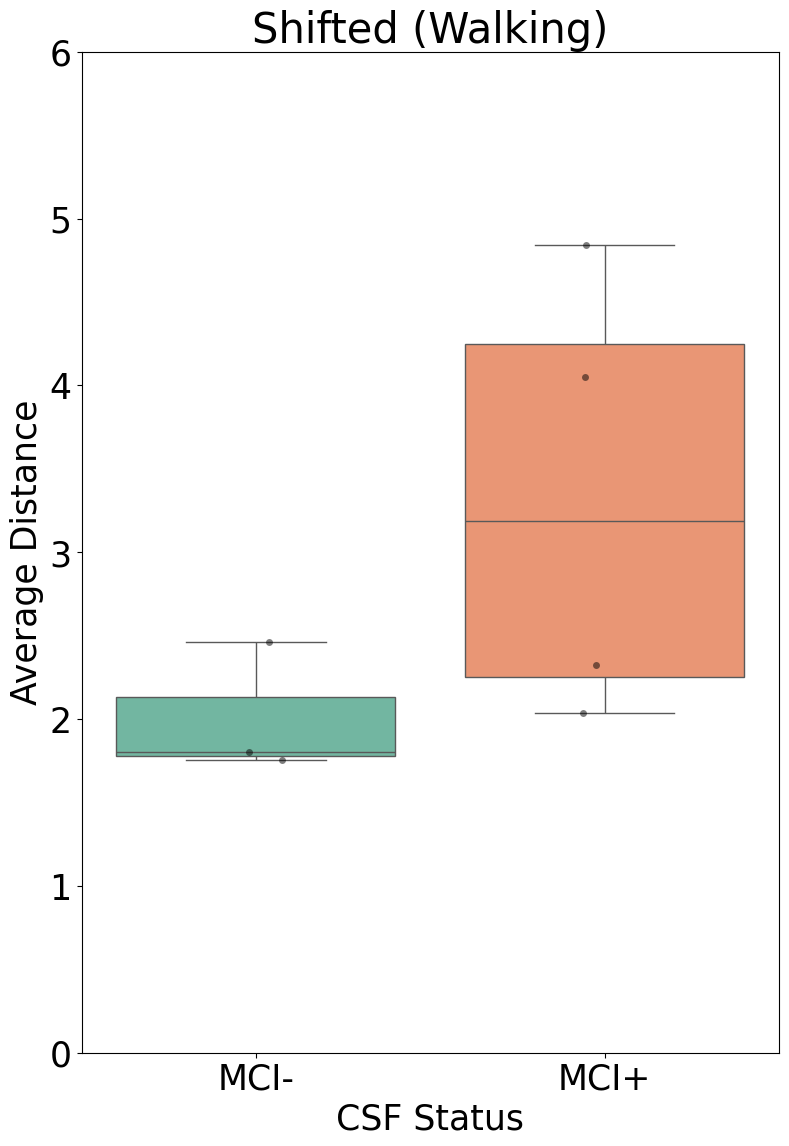

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for Teleport trial type
teleport_data = average_distance_per_trial_type[average_distance_per_trial_type['trial_type'] == 'WalkAllo']

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(9, 13))

# Create the box plot with the data points
sns.boxplot(x='csf', y='average_distance', data=teleport_data, palette="Set2")
sns.stripplot(x='csf', y='average_distance', data=teleport_data, color='black', jitter=True, dodge=True, alpha=0.5)

# Set plot title and labels
plt.title('Shifted (Walking)')
plt.xlabel('CSF Status')
plt.ylabel('Average Distance')

# Set the y-axis to start from zero
plt.ylim(0, 6)
plt.xticks(ticks=[0, 1], labels=['MCI-', 'MCI+'])

visualization_output_dir = os.path.join(os.getcwd(),'output','group_visualization')
os.makedirs(visualization_output_dir,exist_ok=True)
filename_pdf = os.path.join(visualization_output_dir, "average_distance_walking.pdf")

plt.savefig(filename_pdf, format='pdf', dpi=600, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()

C:\Users\acastegnaro\AppData\Local\Temp\ipykernel_1268\1547511795.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='csf', y='average_distance', data=teleport_data, palette="Set2")


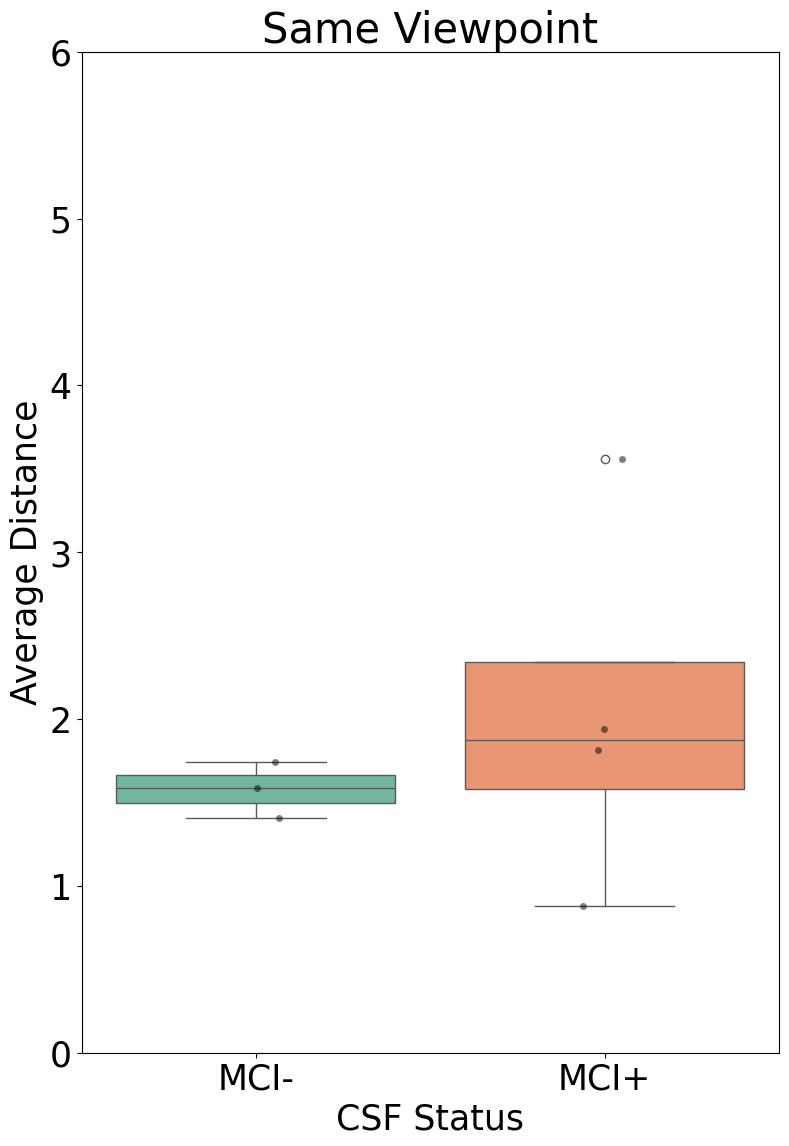

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for Teleport trial type
teleport_data = average_distance_per_trial_type[average_distance_per_trial_type['trial_type'] == 'WalkEgo']

plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(9, 13))

# Create the box plot with the data points
sns.boxplot(x='csf', y='average_distance', data=teleport_data, palette="Set2")
sns.stripplot(x='csf', y='average_distance', data=teleport_data, color='black', jitter=True, dodge=True, alpha=0.5)

# Set plot title and labels
plt.title('Same Viewpoint')
plt.xlabel('CSF Status')
plt.ylabel('Average Distance')

# Set the y-axis to start from zero
plt.ylim(0,6)
plt.xticks(ticks=[0, 1], labels=['MCI-', 'MCI+'])

visualization_output_dir = os.path.join(os.getcwd(),'output','group_visualization')
os.makedirs(visualization_output_dir,exist_ok=True)
filename_pdf = os.path.join(visualization_output_dir, "average_distance_same.pdf")

plt.savefig(filename_pdf, format='pdf', dpi=600, bbox_inches='tight', transparent=True)

# Display the plot
plt.show()

In [ ]:
# Calculate the average distance for each participant and trial type
average_distance_df = all_data_df.groupby(['participant_id', 'trial_type'])['distance'].mean().reset_index()

# Rename the 'distance' column to 'average_distance' for clarity
average_distance_df = average_distance_df.rename(columns={'distance': 'average_distance'})

# Merge the label column back into the average_distance_df
average_distance_df = pd.merge(average_distance_df, all_data_df[['participant_id', 'label']].drop_duplicates(), on='participant_id')

# Display the average distance dataframe
print("\nAverage Distance DataFrame:")
print(average_distance_df.head())